<a id="1"></a>
 <div style="text-align:center; border-radius:25px 80px; padding:9px; color:white; margin:0; font-size:220%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Impact of Climate Change on Maize Agricultural Yield in Kenya
</b></div>

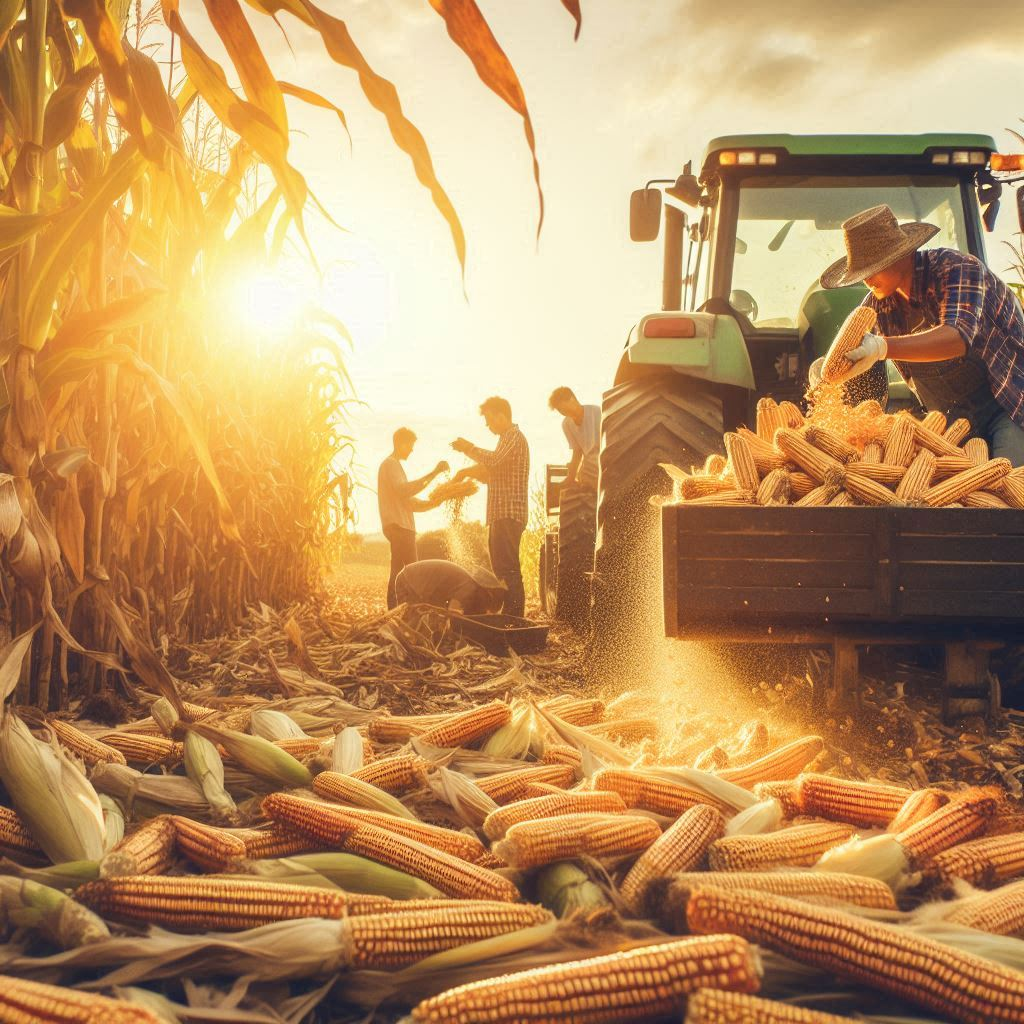

<a id="1"></a>
<div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:220%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Mir Tahmid</b></div>

**mirtahmid@gmail.com**

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Dataset Overview</b></div>
 
The dataset consists of 43 entries and 27 columns, including various agricultural, weather, and environmental factors from Kenya between 1981 and 2023. Key columns include:

area_harvested_usda_1000ha, production_usda_1000ha, yield_usda_1000ha: Agricultural data.

dew_temp_C, soil_temp_L1_C, irradiation_J_m2, precipitation_era5_mm: Weather and environmental factors.

year: The time component for modeling.

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>What We Are Going to Do in the Notebook. </b></div>

Step by Step Procedures

**Import required libraries**

**Loading and Glimpse of dataset**

**Perform data preprocessing and feature engineering.**

**Conduct EDA with bar charts, pie charts, and other visualizations.**

**Build ARIMA, SARIMAX, and Prophet models.**

**Compare their performance using RMSE, MSE, and MAPE.**

In [3]:
!pip install pandas numpy seaborn matplotlib statsmodels scikit-learn prophet skimpy

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Import Required Libraries</b></div>

In [4]:
# Import necessary libraries for data manipulation, visualization, and modeling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical models
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Machine learning metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Prophet for forecasting
from prophet import Prophet

# Skimpy for data overview
import skimpy as sk

# For calculating square root
from math import sqrt

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Data Loading and Glimpse of the Dataset</b></div>

In [5]:
# Load the detrended dataset
detrended_data = pd.read_csv('/kaggle/input/kenya-1981-2023-detrended-var/Kenya_1981_2023_detrended_var.csv')

# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
display(detrended_data.head())

# Display dataset information
print("\nDataset Information:")
detrended_data.info()

# Quick summary statistics using skimpy
print("\nSummary Statistics:")
skim_summary = sk.skim(detrended_data)
display(skim_summary)

First 5 rows of the dataset:


,Unnamed: 0,area,year,area_harvested_usda_1000ha,production_usda_1000ha,yield_usda_1000ha,area_harvested_fao_1000ha,production_fao_1000ha,yield_fao_1000ha,dew_temp_C,...,min_temp_C,evaporation_mm,precipitation_era5_mm,wind_eastward_m_s,wind_northward_m_s,soil_water_L1_fraction,soil_water_L2_fraction,soil_water_L3_fraction,soil_water_L4_fraction,precipitation_chirps_mm
0,21,Kenya,1981,131.255814,400.223044,0.108689,-9.299453,-257.699778,-0.183286,0.262262,...,0.121996,-35.193987,85.864337,-0.012312,-0.084156,0.006795,0.007832,0.009991,0.002788,116.347990
1,22,Kenya,1982,147.717608,214.057384,-0.009067,51.804412,438.386153,0.313478,0.550392,...,0.211274,-77.266848,104.564986,0.069529,-0.137766,0.016485,0.012594,0.003841,0.001746,147.287817
2,23,Kenya,1983,136.179402,-141.108275,-0.206823,116.908277,198.472083,0.015642,0.642850,...,0.581897,-12.259414,3.104755,0.038095,-0.024727,-0.002066,-0.000912,0.003322,0.002588,-95.883328
3,24,Kenya,1984,30.641196,-477.273935,-0.334579,-224.987857,-717.441987,-0.305693,-0.847865,...,-0.107488,66.445984,-137.622346,-0.158085,-0.003519,-0.011966,-0.011190,-0.011569,-0.002990,-95.505084
4,25,Kenya,1985,177.102990,508.560405,0.137665,174.116008,252.643943,-0.023029,-0.212883,...,-0.168897,-33.873441,48.956359,0.049787,-0.007915,0.007368,0.009229,0.011241,0.001420,-3.477588



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  43 non-null     int64  
 1   area                        43 non-null     object 
 2   year                        43 non-null     int64  
 3   area_harvested_usda_1000ha  43 non-null     float64
 4   production_usda_1000ha      43 non-null     float64
 5   yield_usda_1000ha           43 non-null     float64
 6   area_harvested_fao_1000ha   43 non-null     float64
 7   production_fao_1000ha       43 non-null     float64
 8   yield_fao_1000ha            43 non-null     float64
 9   dew_temp_C                  43 non-null     float64
 10  soil_temp_L1_C              43 non-null     float64
 11  soil_temp_L2_C              43 non-null     float64
 12  soil_temp_L3_C              43 non-null     float64
 13  soil_temp_L4_C 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 43     │ │ float64     │ 24    │                                                          │
│ │ Number of columns │ 27     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: │  0 │    0 │       42 │    12.56 │       21 │     31.5 │       42 │     52.5 │       63 │ ▇▇▇▇▇▇ │  │
│ │ 0        │    │      │          │          │          │          │          │          │          │        │  │
│ │ year     │  0 │    0 │     2002 │    12.56 │     1981 │     1992 │     2002 │     2012 │     2023 │ ▇▇▇▇▇▇ │  │
│ │ area_har │  0 │    0 │ -2.116e- │    172.5 │   -519.1 │   -128.8 │    39.88 │    133.7 │    305.4 │  ▂▃▃▇▃ │  │
│ │ vested_u │    │      │       12 │          │          │          │          │          │          │        │  │
│ │ sda_1000 │    │      │          │          │          │          │          │          │          │        │  │
│ │ ha       │    │      │          │          │          │          │          │          │          │        │  │
│ │ producti │  0 │    0 │ -3.047e- │    390.4 │   -767.8 │   -300.6 │    7.425 │    330.6 │    612.1 │ ▃▅▇▇▆▇ │  │
│ │ on_usda_ │    │      │       12 │          │          │          │          │          │          │        │  │
│ │ 1000ha   │    │      │          │          │          │          │          │          │          │        │  │
│ │ yield_us │  0 │    0 │ -5.487e- │   0.1756 │  -0.4544 │  -0.1133 │  0.01011 │   0.1274 │   0.3803 │ ▁▃▃▆▇▁ │  │
│ │ da_1000h │    │      │       17 │          │          │          │          │          │          │        │  │
│ │ a        │    │      │          │          │          │          │          │          │          │        │  │
│ │ area_har │  0 │    0 │ 6.525e-1 │    136.3 │   -396.6 │   -71.39 │   -9.299 │    107.8 │    266.9 │ ▁▂▅▇▇▃ │  │
│ │ vested_f │    │      │        2 │          │          │          │          │          │          │        │  │
│ │ ao_1000h │    │      │          │          │          │          │          │          │          │        │  │
│ │ a        │    │      │          │          │          │          │          │          │          │        │  │
│ │ producti │  0 │    0 │ 1.085e-1 │    377.6 │   -717.4 │   -274.1 │    -4.84 │    279.1 │    682.7 │ ▃▆▆▇▆▅ │  │
│ │ on_fao_1 │    │      │        1 │          │          │          │          │          │          │        │  │
│ │ 000ha    │    │      │          │          │          │          │          │          │          │        │  │
│ │ yield_fa │  0 │    0 │ -7.668e- │   0.1783 │   -0.35

None

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Data Preprocessing and Feature Engineering</b></div>

In [39]:
# Select relevant columns: 'year', 'yield_usda_1000ha', and 'production_usda_1000ha'
data_cleaned = detrended_data[['year', 'yield_usda_1000ha', 'production_usda_1000ha']].copy()

# Set 'year' as the index
data_cleaned.set_index('year', inplace=True)

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Convert the Series to DataFrame for styling
missing_values_df = missing_values.to_frame(name='Missing Values')

# Display missing values with color styling
print("Missing Values:")
missing_values_styled = missing_values_df.style.applymap(lambda x: 'color: lime' if x == 0 else 'color: green')
display(missing_values_styled)

# Since the data is already detrended, no further detrending is required

# Display the cleaned data with color styling
print("\nCleaned Data:")
cleaned_data_styled = data_cleaned.style.background_gradient(cmap='YlGn')
display(cleaned_data_styled)

Missing Values:


,Missing Values
yield_usda_1000ha,0
production_usda_1000ha,0



Cleaned Data:


,yield_usda_1000ha,production_usda_1000ha
year,,
1981,0.108689,400.223044
1982,-0.009067,214.057384
1983,-0.206823,-141.108275
1984,-0.334579,-477.273935
1985,0.137665,508.560405
1986,0.159909,548.394745
1987,0.112153,138.229085
1988,0.144397,513.063425
1989,0.126641,453.897765


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Exploratory Data Analysis (EDA)</b></div>

**Plotting Yield USDA (1000ha) over Time**

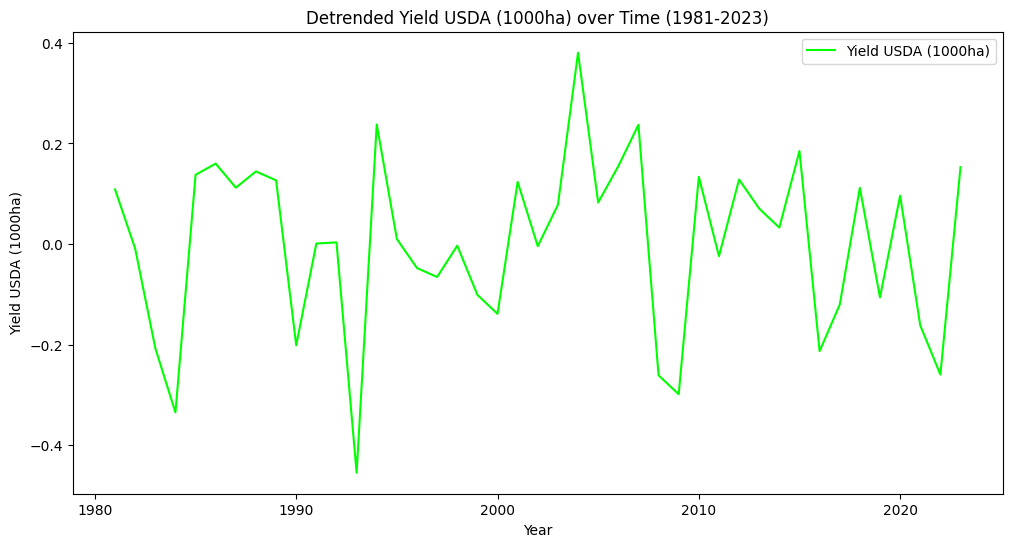

In [36]:
plt.figure(figsize=(12,6))
plt.plot(data_cleaned['yield_usda_1000ha'], label='Yield USDA (1000ha)', color='lime')
plt.title('Detrended Yield USDA (1000ha) over Time (1981-2023)')
plt.xlabel('Year')
plt.ylabel('Yield USDA (1000ha)')
plt.legend()
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Plotting Production USDA (1000ha) over Time</b></div>

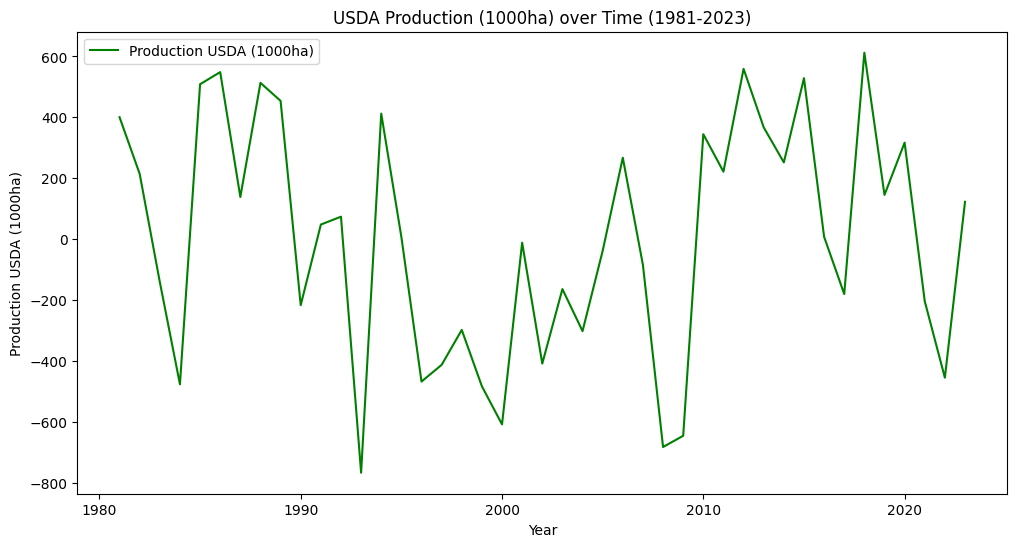

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data_cleaned['production_usda_1000ha'], label='Production USDA (1000ha)', color='green')
plt.title('USDA Production (1000ha) over Time (1981-2023)')
plt.xlabel('Year')
plt.ylabel('Production USDA (1000ha)')
plt.legend()
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Comparing Yield and Production on the Same Plot</b></div>

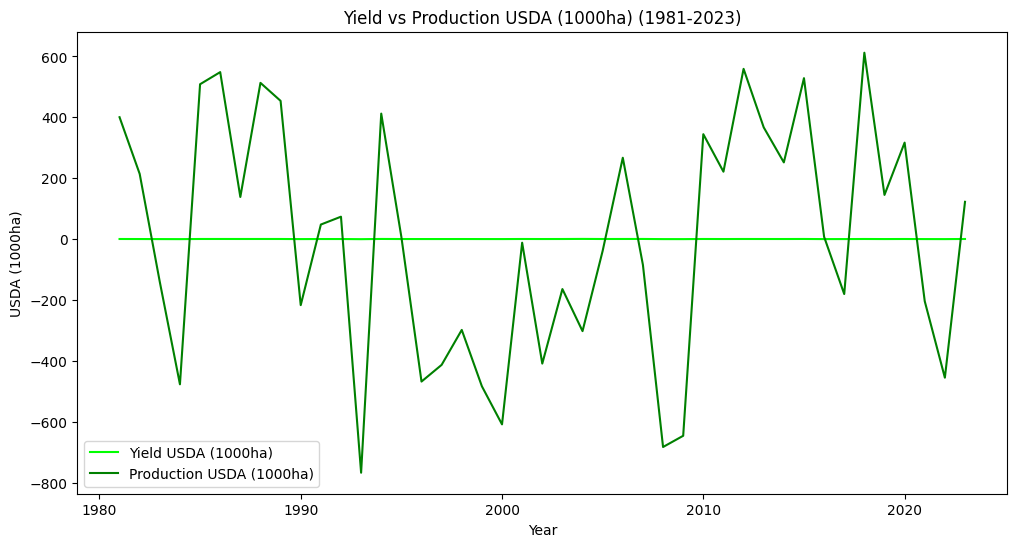

In [35]:
plt.figure(figsize=(12,6))
plt.plot(data_cleaned['yield_usda_1000ha'], label='Yield USDA (1000ha)', color='lime')
plt.plot(data_cleaned['production_usda_1000ha'], label='Production USDA (1000ha)', color='green')
plt.title('Yield vs Production USDA (1000ha) (1981-2023)')
plt.xlabel('Year')
plt.ylabel('USDA (1000ha)')
plt.legend()
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Distribution of USDA Production (1000ha)</b></div>

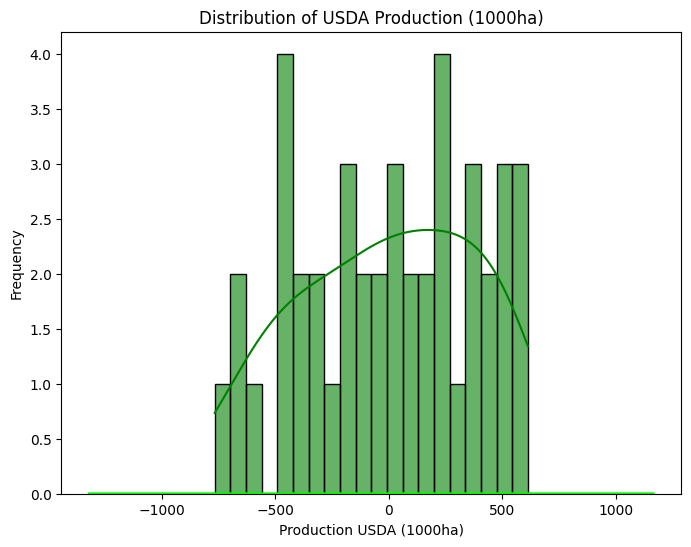

In [34]:
plt.figure(figsize=(8, 6))

# Create a histogram with KDE
sns.histplot(data_cleaned['production_usda_1000ha'], bins=20, kde=True, color='green', alpha=0.6)

# Overlay the KDE line with lime color
sns.kdeplot(data_cleaned['production_usda_1000ha'], color='lime', linewidth=2)

# Title and labels
plt.title('Distribution of USDA Production (1000ha)')
plt.xlabel('Production USDA (1000ha)')
plt.ylabel('Frequency')

# Show plot
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Correlation Analysis</b></div>

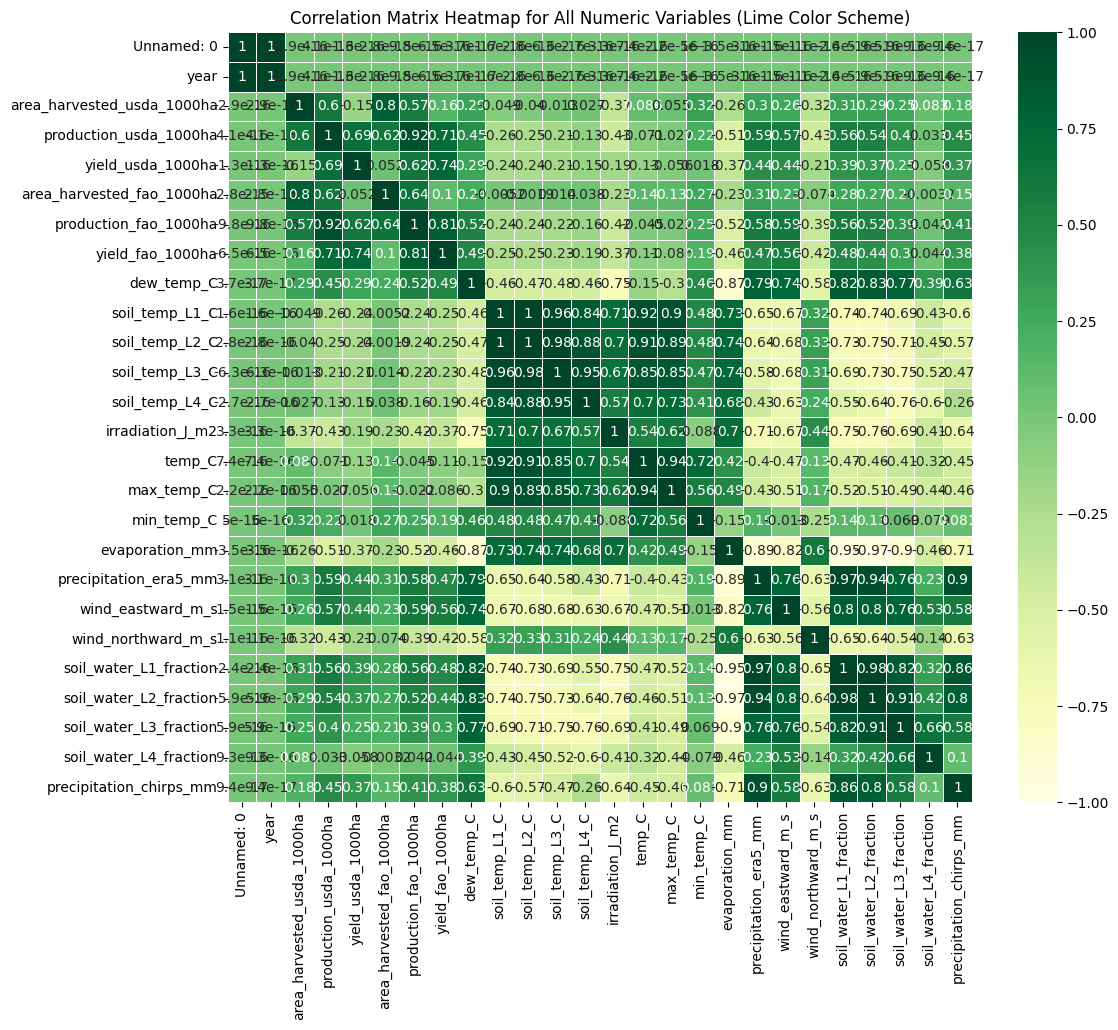

In [25]:
# Select only numeric columns
numeric_data = detrended_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_data.corr()

# Plot the heatmap using a lime-green color palette (YlGn)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for All Numeric Variables (Lime Color Scheme)')
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Correlation Between Yield and Production</b></div>

In [40]:
# Calculate the correlation matrix for yield and production
correlation = data_cleaned[['yield_usda_1000ha', 'production_usda_1000ha']].corr()

# Print the correlation matrix
print("Correlation between Yield and Production:")

# Style the correlation DataFrame with lime and green colors
correlation_styled = correlation.style.background_gradient(cmap='YlGn')
display(correlation_styled)

Correlation between Yield and Production:


,yield_usda_1000ha,production_usda_1000ha
yield_usda_1000ha,1.000000,0.690838
production_usda_1000ha,0.690838,1.000000


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Building ARIMA, SARIMAX, & Prophet Models</b></div>

**Splitting the Data into Training and Testing Sets**

In [12]:
# Define the target variable
target = 'yield_usda_1000ha'

# Split the data: Last 10 years for testing, the rest for training
train = data_cleaned[target].iloc[:-10]
test = data_cleaned[target].iloc[-10:]

print(f"Training Data Shape: {train.shape}")
print(f"Testing Data Shape: {test.shape}")

Training Data Shape: (33,)
Testing Data Shape: (10,)


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Building ARIMA, SARIMAX, and Prophet Models</b></div>

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Building the ARIMA Model</b></div>

In [13]:
# Define and fit the ARIMA model
# We need to tune the order (p,d,q) based on ACF and PACF plots
arima_order = (5, 0, 1) 
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Summary of the ARIMA model
print("ARIMA Model Summary:")
display(arima_fit.summary())

# Make predictions
arima_pred = arima_fit.forecast(steps=len(test))
print("\nARIMA Predictions:")
display(arima_pred)

ARIMA Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      yield_usda_1000ha   No. Observations:                   33
Model:                 ARIMA(5, 0, 1)   Log Likelihood                  14.386
Date:                Tue, 01 Oct 2024   AIC                            -12.772
Time:                        03:57:57   BIC                             -0.800
Sample:                             0   HQIC                            -8.744
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.023      0.497      0.619      -0.033       0.056
ar.L1         -0.0902      0.989     -0.091      0.927      -2.028       1.848
ar.L2         -0.1133      0.224     -0.506      0.613      -0.552       0.325
ar.L3          0.0445      0.208      0.214      0.831      -0.364       0.453
ar.L4         -0.3529      0.162     -2.184      0.029      -0.670      -0.036
ar.L5         -0.3189      0.439     -0.727      0.467      -1.179       0.541
ma.L1          0.1000      1.057      0.095      0.925      -1.972       2.171
sigma2         0.0237      0.008      2.912      0.004       0.008       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.98   Prob(JB):                         0.60
Heteroskedasticity (H):               1.38   Skew:                            -0.39
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


ARIMA Predictions:


33    0.032078
34   -0.018618
35   -0.015691
36   -0.040091
37   -0.008501
38    0.021690
39    0.029438
40    0.034404
41    0.031055
42    0.010410
Name: predicted_mean, dtype: float64

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Building the SARIMAX Model</b></div>

In [43]:
# Define and fit the SARIMAX model
sarimax_order = (1, 0, 1)
seasonal_order = (1, 1, 0, 12)
sarimax_model = SARIMAX(train, order=sarimax_order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit(disp=False)

# Summary of the SARIMAX model
print("SARIMAX Model Summary:")
display(sarimax_fit.summary())

# Make predictions
sarimax_pred = sarimax_fit.forecast(steps=len(test))
print("\nSARIMAX Predictions:")
display(sarimax_pred)

SARIMAX Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                   yield_usda_1000ha   No. Observations:                   33
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                   1.533
Date:                             Tue, 01 Oct 2024   AIC                              4.934
Time:                                     04:23:58   BIC                              9.112
Sample:                                          0   HQIC                             5.841
                                              - 33                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2280      0.821     -0.278      0.781      -1.837       1.381
ma.L1          0.4996      0.730      0.685      0.494      -0.930       1.930
ar.S.L12      -0.6683      0.189     -3.543      0.000      -1.038      -0.299
sigma2         0.0359      0.015      2.409      0.016       0.007       0.065
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.55   Prob(JB):                         0.81
Heteroskedasticity (H):               0.79   Skew:                            -0.25
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


SARIMAX Predictions:


33   -0.171274
34    0.034735
35    0.126557
36   -0.275863
37    0.210211
38    0.085400
39   -0.118331
40   -0.142715
41    0.042257
42   -0.075401
Name: predicted_mean, dtype: float64

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Building the Prophet Model</b></div>

In [30]:
# Prepare data for Prophet
prophet_data = data_cleaned.reset_index().rename(columns={'year': 'ds', 'yield_usda_1000ha': 'y'})

# Split into training and testing for Prophet
prophet_train = prophet_data.iloc[:-10]
prophet_test = prophet_data.iloc[-10:]

# Initialize and fit the Prophet model
from prophet import Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Create a dataframe to hold predictions
future = prophet_model.make_future_dataframe(periods=10, freq='Y')
prophet_forecast = prophet_model.predict(future)

# Extract the forecasted values
prophet_pred = prophet_forecast['yhat'][-10:].values

# Create a DataFrame to display the predictions with lime and green colors
prophet_pred_df = pd.DataFrame({
    'Year': prophet_test['ds'],
    'Actual': prophet_test['y'],
    'Prophet Prediction': prophet_pred
})

# Style the DataFrame using lime-green color scheme
prophet_pred_styled = prophet_pred_df.style.background_gradient(cmap='YlGn')

print("\nProphet Predictions with Lime and Green:")
display(prophet_pred_styled)

04:13:39 - cmdstanpy - INFO - Chain [1] start processing
04:13:39 - cmdstanpy - INFO - Chain [1] done processing



Prophet Predictions with Lime and Green:


,Year,Actual,Prophet Prediction
33,2014,0.032742,-0.074716
34,2015,0.184986,-0.081174
35,2016,-0.212770,-0.056101
36,2017,-0.120526,-0.060436
37,2018,0.111719,-0.065838
38,2019,-0.106037,-0.072296
39,2020,0.096207,-0.047224
40,2021,-0.161549,-0.051559
41,2022,-0.259305,-0.056961
42,2023,0.152939,-0.063418


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Comparing Model Performance using RMSE, MSE, & MAPE</b></div>

In [29]:
# Calculate performance metrics for ARIMA
arima_rmse = sqrt(mean_squared_error(test, arima_pred))
arima_mse = mean_squared_error(test, arima_pred)
arima_mape = mean_absolute_percentage_error(test, arima_pred)

# Calculate performance metrics for SARIMAX
sarimax_rmse = sqrt(mean_squared_error(test, sarimax_pred))
sarimax_mse = mean_squared_error(test, sarimax_pred)
sarimax_mape = mean_absolute_percentage_error(test, sarimax_pred)

# Calculate performance metrics for Prophet
prophet_rmse = sqrt(mean_squared_error(test, prophet_pred))
prophet_mse = mean_squared_error(test, prophet_pred)
prophet_mape = mean_absolute_percentage_error(test, prophet_pred)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMAX', 'Prophet'],
    'RMSE': [arima_rmse, sarimax_rmse, prophet_rmse],
    'MSE': [arima_mse, sarimax_mse, prophet_mse],
    'MAPE': [arima_mape, sarimax_mape, prophet_mape]
})

# Display the DataFrame with lime and green gradient
comparison_df_styled = comparison_df.style.background_gradient(cmap='YlGn')

print("Model Performance Comparison:")
display(comparison_df_styled)

Model Performance Comparison:


,Model,RMSE,MSE,MAPE
0,ARIMA,0.162792,0.026501,0.895389
1,SARIMAX,0.209590,0.043928,1.761633
2,Prophet,0.162368,0.026363,1.222987


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Visualizing the Forecasts</b></div>

**Plotting Actual vs Predicted Values**

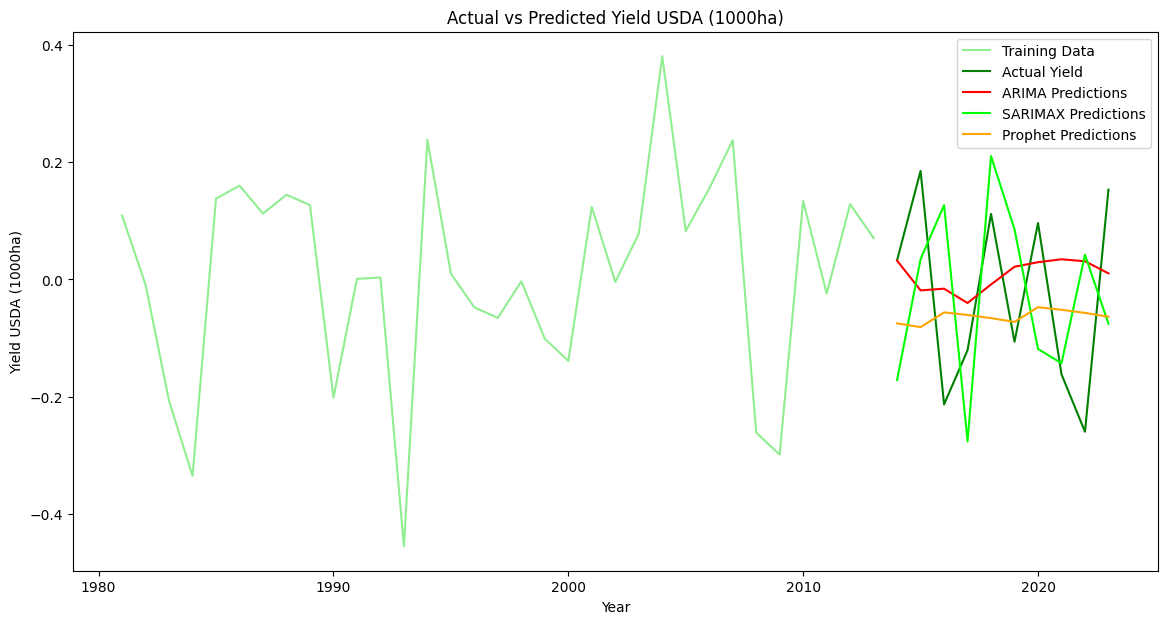

In [28]:
plt.figure(figsize=(14, 7))

# Plot training data in blue
plt.plot(train.index, train, label='Training Data', color='lightgreen')

# Plot actual data in green (Actual Yield)
plt.plot(test.index, test, label='Actual Yield', color='green')

# ARIMA predictions in red
plt.plot(test.index, arima_pred, label='ARIMA Predictions', color='red')

# SARIMAX predictions in lime (custom color)
plt.plot(test.index, sarimax_pred, label='SARIMAX Predictions', color='lime')

# Prophet predictions in orange
plt.plot(test.index, prophet_pred, label='Prophet Predictions', color='orange')

# Title and labels
plt.title('Actual vs Predicted Yield USDA (1000ha)')
plt.xlabel('Year')
plt.ylabel('Yield USDA (1000ha)')

# Display legend
plt.legend()

# Show plot
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Prophet Forecast Components</b></div>

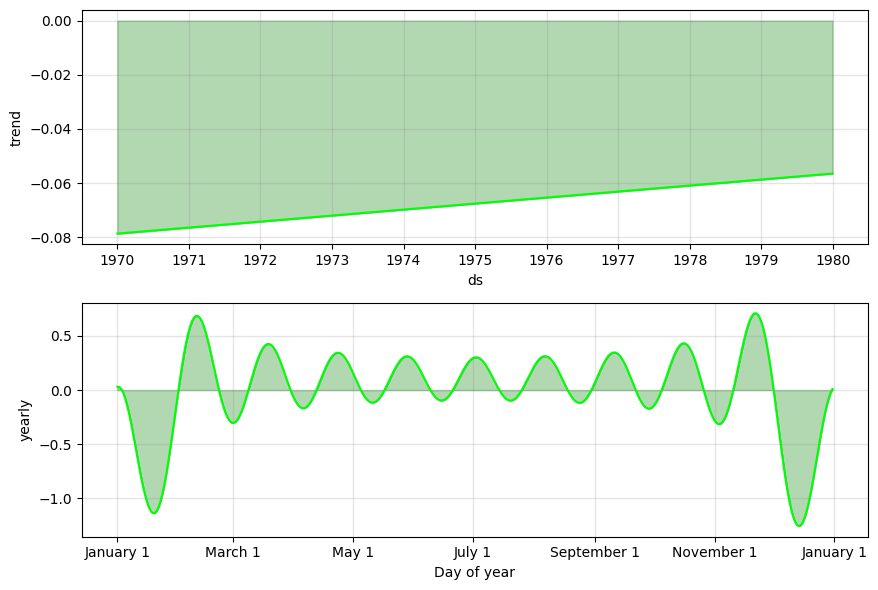

In [26]:
# Plot Prophet forecast components
components = prophet_model.plot_components(prophet_forecast)

# Customize trend, seasonality, and holidays plots
for ax in components.get_axes():
    ax.lines[0].set_color('lime')
    ax.fill_between(ax.get_lines()[0].get_xdata(), ax.get_lines()[0].get_ydata(), color='green', alpha=0.3)  # Fill to green

# Display the customized plots
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 90px; padding:9px; color:white; margin:0; font-size:120%; font-family:Pacifico; background-color:#9ACD32; overflow:hidden"><b>Thank You</b></div>